<a href="https://colab.research.google.com/github/Jomonjoseph25/DSA_B5_Assignments/blob/main/Case_Study_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Load Data**

In [103]:
iris = pd.read_excel('/content/drive/MyDrive/Case Study 7/iris.xls')
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [68]:
iris.shape

(150, 5)

In [69]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [104]:
iris.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [71]:
iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

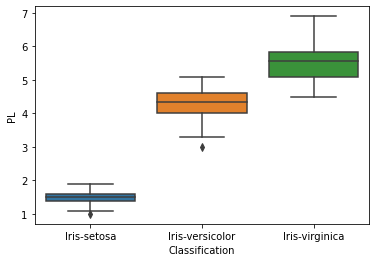

In [105]:
sns.boxplot(x="Classification", y="PL", data=iris)

**Preprocessing**

In [72]:
for i in ['SL', 'SW', 'PL']:
  iris[i]=iris[i].fillna(iris[i].median(),downcast=False)
y = iris.drop(['SL', 'SW', 'PL', 'PW'],axis=1)
x = iris.drop(['Classification'],axis=1)


In [94]:
iris = pd.get_dummies(iris)
iris

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.40,0.2,1,0,0
1,4.9,3.0,1.40,0.2,1,0,0
2,5.8,3.2,1.30,0.2,1,0,0
3,4.6,3.1,1.50,0.2,1,0,0
4,5.0,3.6,1.40,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,0,0,1
146,6.3,2.5,5.00,1.9,0,0,1
147,6.5,3.0,4.35,2.0,0,0,1
148,6.2,3.4,5.40,2.3,0,0,1


Splitting the Data

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)
x_train.shape

(112, 4)

In [96]:
x_test.shape

(38, 4)

**Training Models**

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

**Model 1 - Logistics Regression**

In [98]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [99]:
y_prediction = logistic_model.predict(x_test)

In [100]:
from sklearn.metrics import accuracy_score
print("Accuracy is:",accuracy_score(y_test,y_prediction))

Accuracy is: 0.9736842105263158


**Model 2 - SVM**

In [101]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train, y_train)
y_pred = svm_linear.predict(x_test)
print("The accuracy score using linear svm is ", accuracy_score(y_test,y_pred))

The accuracy score using linear svm is  1.0


**Model - 3 Random Forest**

In [86]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("The accuracy score using random forest classifier is ", accuracy_score(y_test,y_pred))

The accuracy score using random forest classifier is  1.0


SVM and Random Forest model give best results as they they have highest accuracy
